## Contoh spline window

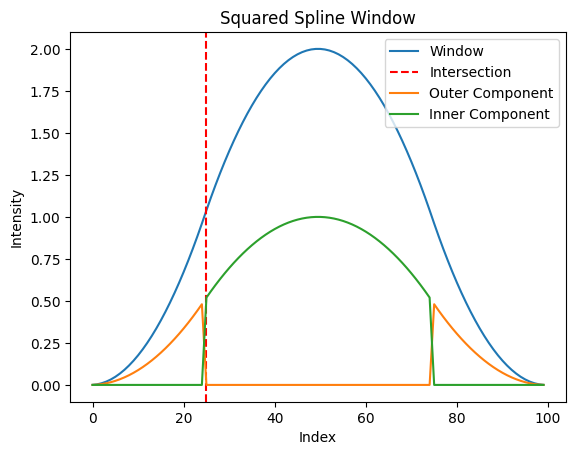

In [8]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

def _spline_window(window_size, power=2):
    intersection = int(window_size/4)
    wind_outer = (abs(2*(scipy.signal.triang(window_size))) ** power)/2
    wind_outer[intersection:-intersection] = 0

    wind_inner = 1 - (abs(2*(scipy.signal.triang(window_size) - 1)) ** power)/2
    wind_inner[:intersection] = 0
    wind_inner[-intersection:] = 0

    wind = wind_inner + wind_outer
    wind = wind / np.average(wind)
    return wind

# Parameters
window_size = 100
power = 2

# Generate spline window
window = _spline_window(window_size, power)
intersection = int(window_size/4)

# Plotting
fig, ax = plt.subplots()

# Plotting the window
ax.plot(window, label='Window')

# Highlighting the intersection
ax.axvline(x=intersection, color='red', linestyle='--', label='Intersection')

# Plotting the outer and inner components
wind_outer = (abs(2*(scipy.signal.triang(window_size))) ** power)/2
wind_inner = 1 - (abs(2*(scipy.signal.triang(window_size) - 1)) ** power)/2
wind_outer[intersection:-intersection] = 0
wind_inner[:intersection] = 0
wind_inner[-intersection:] = 0
ax.plot(wind_outer, label='Outer Component')
ax.plot(wind_inner, label='Inner Component')

# Set plot title and labels
ax.set_title('Squared Spline Window')
ax.set_xlabel('Index')
ax.set_ylabel('Intensity')

# Display the legend
ax.legend()

# Show the plot
plt.show()


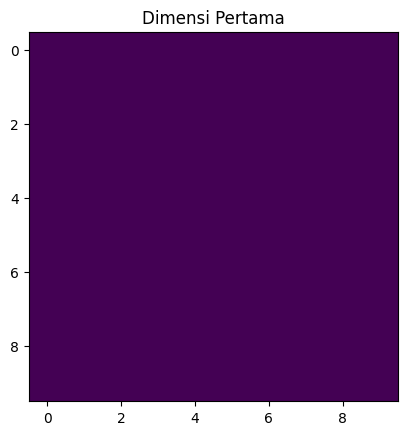

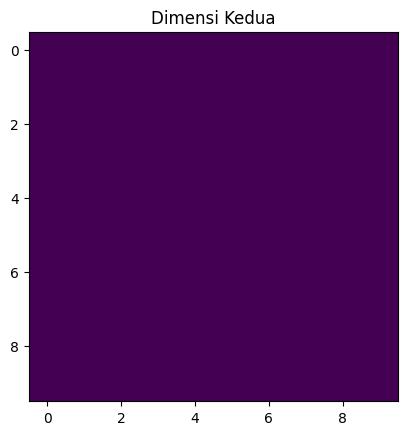

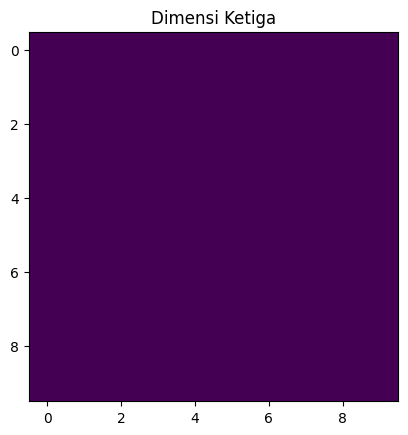

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat contoh data untuk visualisasi
window_size = 10
power = 2
wind = np.ones((window_size, window_size, window_size))

# Ekspansi dimensi pertama
wind_dim1 = np.expand_dims(wind[:, :, 0], axis=2)

# Ekspansi dimensi kedua
wind_dim2 = np.expand_dims(wind[:, :, 1], axis=2)

# Ekspansi dimensi ketiga
wind_dim3 = np.expand_dims(wind[:, :, 2], axis=2)

# Visualisasi dimensi pertama
plt.imshow(wind_dim1[:, :, 0], cmap='viridis')
plt.title('Dimensi Pertama')
plt.show()

# Visualisasi dimensi kedua
plt.imshow(wind_dim2[:, :, 0], cmap='viridis')
plt.title('Dimensi Kedua')
plt.show()

# Visualisasi dimensi ketiga
plt.imshow(wind_dim3[:, :, 0], cmap='viridis')
plt.title('Dimensi Ketiga')
plt.show()


In [11]:
from smooth_tiled_predictions import predict_img_with_smooth_windowing

from your_code import your_model

# Instanciate a U-Net CNN (or any similarly-behaved neural network) in the variable named `model`. We use a Keras model but it can be anything:
model = your_model()

# CNN's receptive field's border size: size of patches
window_size = 160

# Amount of categories predicted per pixels.
nb_classes = 10

# Load an image. Convention is channel_last, such as having an input_img.shape of: (x, y, nb_channels), where nb_channels is of 3 for regular RGB images.
input_img = ...

# Use the algorithm. The `pred_func` is passed and will process all the image 8-fold by tiling small patches with overlap, called once with all those image as a batch outer dimension.
# Note that model.predict(...) accepts a 4D tensor of shape (batch, x, y, nb_channels), such as a Keras model.
predictions_smooth = predict_img_with_smooth_windowing(
    input_img,
    window_size=window_size,
    subdivisions=2,  # Minimal amount of overlap for windowing. Must be an even number.
    nb_classes=nb_classes,
    pred_func=(
        lambda img_batch_subdiv: model.predict(image_to_neural_input(img_batch_subdiv))
    )
)

# For more details, refer to comments and code in smooth_tiled_predictions.py

ModuleNotFoundError: No module named 'your_code'